In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Read the file

In [58]:
file = pd.ExcelFile('OSA_extreme_male.xlsx')
df = file.parse('Sheet1')
df.columns.tolist()

['Patient',
 'Gender',
 'IAH',
 'Weight',
 'Height',
 'Age',
 'Cervical',
 'OSA',
 'BMI']

### Get the data

In [3]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ["Patient","OSA","IAH",'Weight', 'Height','Gender']]
target = "OSA"
columns

['Age', 'Cervical', 'BMI']

## Logistic regression

### Create and fit the model

In [4]:
model = LogisticRegression(solver='liblinear', C=15.0, random_state=0) #default value of C=1.0
model.fit(df[columns], df[target])

LogisticRegression(C=15.0, random_state=0, solver='liblinear')

In [5]:
model = LogisticRegression(solver='liblinear',C=15.0, random_state=0).fit(df[columns], df[target])

In [6]:
model.classes_

array(['Healthy', 'Severe'], dtype=object)

In [7]:
model.intercept_

array([-9.37982023])

In [8]:
model.coef_

array([[0.04997754, 0.06355781, 0.14430661]])

### Evaluate the model

In [9]:
model.predict_proba(df[columns])

array([[0.79913894, 0.20086106],
       [0.6800346 , 0.3199654 ],
       [0.60253845, 0.39746155],
       [0.05527544, 0.94472456],
       [0.73687703, 0.26312297],
       [0.48212959, 0.51787041],
       [0.40177694, 0.59822306],
       [0.21659837, 0.78340163],
       [0.72698025, 0.27301975],
       [0.22732643, 0.77267357],
       [0.65783874, 0.34216126],
       [0.17754725, 0.82245275],
       [0.51616101, 0.48383899],
       [0.31924681, 0.68075319],
       [0.49903539, 0.50096461],
       [0.3496697 , 0.6503303 ],
       [0.4949566 , 0.5050434 ],
       [0.11574479, 0.88425521],
       [0.78740875, 0.21259125],
       [0.77156935, 0.22843065],
       [0.49032915, 0.50967085],
       [0.35060814, 0.64939186],
       [0.63718171, 0.36281829],
       [0.72687554, 0.27312446],
       [0.46665171, 0.53334829],
       [0.58761826, 0.41238174],
       [0.85038149, 0.14961851],
       [0.63709544, 0.36290456],
       [0.1570587 , 0.8429413 ],
       [0.72250918, 0.27749082],
       [0.

In [10]:
model.predict(df[columns])

array(['Healthy', 'Healthy', 'Healthy', 'Severe', 'Healthy', 'Severe',
       'Severe', 'Severe', 'Healthy', 'Severe', 'Healthy', 'Severe',
       'Healthy', 'Severe', 'Severe', 'Severe', 'Severe', 'Severe',
       'Healthy', 'Healthy', 'Severe', 'Severe', 'Healthy', 'Healthy',
       'Severe', 'Healthy', 'Healthy', 'Healthy', 'Severe', 'Healthy',
       'Healthy', 'Healthy', 'Severe', 'Severe', 'Healthy', 'Severe',
       'Severe', 'Healthy', 'Severe', 'Healthy', 'Healthy', 'Healthy',
       'Severe', 'Healthy', 'Severe', 'Healthy', 'Healthy', 'Severe',
       'Healthy', 'Severe', 'Severe', 'Healthy', 'Severe', 'Healthy',
       'Healthy', 'Healthy', 'Severe', 'Healthy', 'Severe', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Severe', 'Severe', 'Healthy',
       'Healthy', 'Severe', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Severe', 'Healthy', 'Healthy', 'Severe',
       'Severe', 'Severe', 'Healthy', 'Healthy', 'Severe', 'Healthy',
       'Severe

In [11]:
model.score(df[columns], df[target])

0.7220216606498195

In [12]:
confusion_matrix(df[target], model.predict(df[columns]))

array([[104,  37],
       [ 40,  96]], dtype=int64)

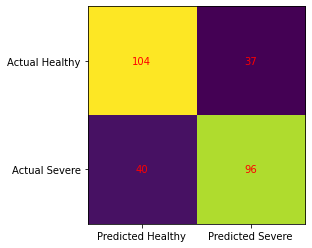

In [13]:
cm = confusion_matrix(df[target], model.predict(df[columns]))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Healthy', 'Predicted Severe'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Healthy', 'Actual Severe'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [14]:
print(classification_report(df[target], model.predict(df[columns])))

              precision    recall  f1-score   support

     Healthy       0.72      0.74      0.73       141
      Severe       0.72      0.71      0.71       136

    accuracy                           0.72       277
   macro avg       0.72      0.72      0.72       277
weighted avg       0.72      0.72      0.72       277



### Split train and test sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[columns], df[target], test_size=0.2, random_state=0)

### Cross-validation

In [16]:
from sklearn import metrics, model_selection

predicted = model_selection.cross_val_predict(model, df[columns], df[target], cv=10)
metrics.accuracy_score(df[target], predicted)
print(metrics.accuracy_score(df[target], predicted))

0.703971119133574


In [17]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(model, df[columns], df[target], cv=10,scoring='accuracy')
print(accuracy)
print(cross_val_score(model, df[columns], df[target], cv=10,scoring='accuracy').mean())

[0.71428571 0.67857143 0.85714286 0.60714286 0.57142857 0.71428571
 0.75       0.77777778 0.66666667 0.7037037 ]
0.7041005291005291


### Confusion matrix

In [18]:
from nltk import ConfusionMatrix 
print(ConfusionMatrix(list(df[target]), list(predicted)))

        |   H     |
        |   e   S |
        |   a   e |
        |   l   v |
        |   t   e |
        |   h   r |
        |   y   e |
--------+---------+
Healthy |<103> 38 |
 Severe |  44 <92>|
--------+---------+
(row = reference; col = test)



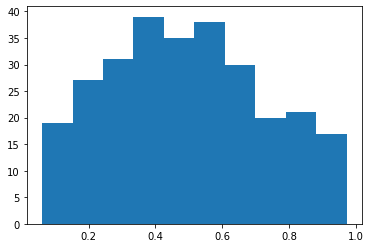

In [19]:
probs = model.predict_proba(df[columns])[:, 1] 
plt.hist(probs) 
plt.show()

In [20]:
print (metrics.accuracy_score(df[target], predicted)) 

0.703971119133574


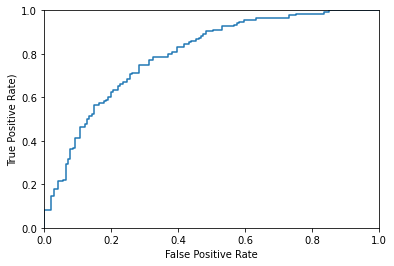

In [28]:
#ROC CURVES and AUC 
# plot ROC curve 

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

y = label_binarize(df[target], classes=['Healthy', 'Severe'])
fpr, tpr, thresholds = roc_curve(y, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
auc = roc_auc_score(df[target],probs)
print('AUC: %3f' % auc)

AUC: 0.795369


## SVM

In [34]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


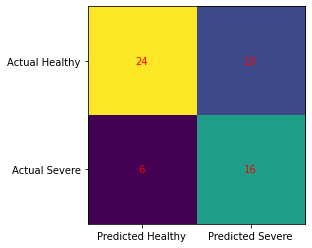

In [47]:
cm_svm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Healthy', 'Predicted Severe'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Healthy', 'Actual Severe'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svm[i, j], ha='center', va='center', color='red')
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.80      0.71      0.75        34
      Severe       0.62      0.73      0.67        22

    accuracy                           0.71        56
   macro avg       0.71      0.72      0.71        56
weighted avg       0.73      0.71      0.72        56



In [42]:
file2 = 'OSA_Aggregated_UPM.xlsx'
xl2 = pd.ExcelFile(file2)
df_OSA_inner = xl2.parse('Sheet1')

columns2 = df_OSA_inner.columns.tolist()
columns2 = [c for c in columns2 if c in ['Weight', 'Height', 'Age', 'Cervical', 'BMI', 'E_Form1']]
target = "OSA"
columns2

['Weight', 'Height', 'Age', 'Cervical', 'BMI', 'E_Form1']

In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_OSA_inner[columns2], df_OSA_inner[target], test_size=0.2, random_state=0)

In [45]:
clf2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.7714285714285715


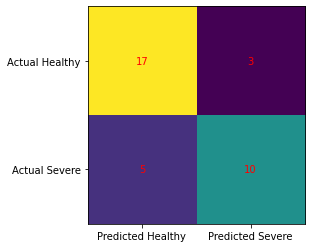

In [48]:
cm_svm2 = confusion_matrix(y_test2, y_pred2)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm_svm2)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Healthy', 'Predicted Severe'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Healthy', 'Actual Severe'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svm2[i, j], ha='center', va='center', color='red')
plt.show()

In [49]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

     Healthy       0.77      0.85      0.81        20
      Severe       0.77      0.67      0.71        15

    accuracy                           0.77        35
   macro avg       0.77      0.76      0.76        35
weighted avg       0.77      0.77      0.77        35



## KNN

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred_knn = classifier.predict(X_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.6785714285714286


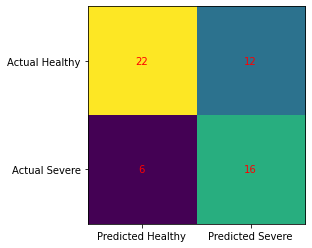

In [55]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm_knn)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Healthy', 'Predicted Severe'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Healthy', 'Actual Severe'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_knn[i, j], ha='center', va='center', color='red')
plt.show()

In [56]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

     Healthy       0.79      0.65      0.71        34
      Severe       0.57      0.73      0.64        22

    accuracy                           0.68        56
   macro avg       0.68      0.69      0.67        56
weighted avg       0.70      0.68      0.68        56

